In [3]:
pip install pandas matplotlib seaborn wordcloud openpyxl

Note: you may need to restart the kernel to use updated packages.


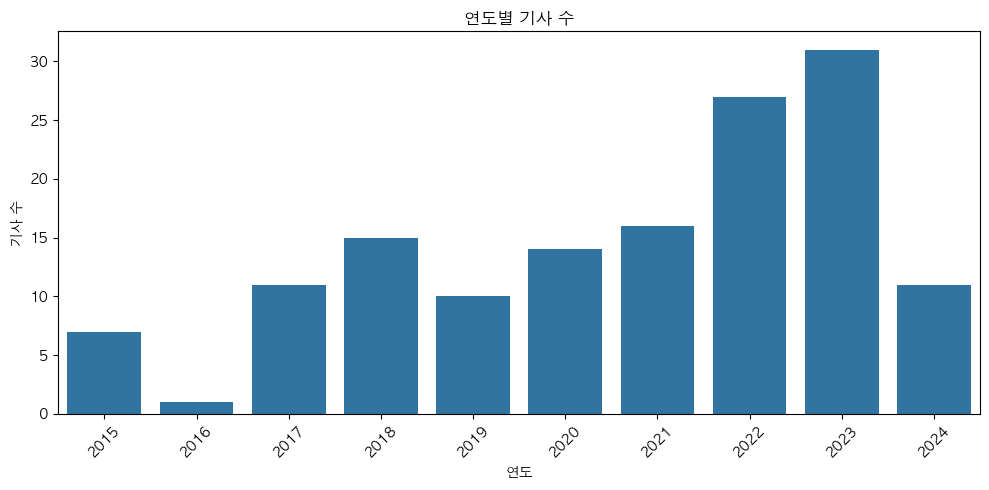

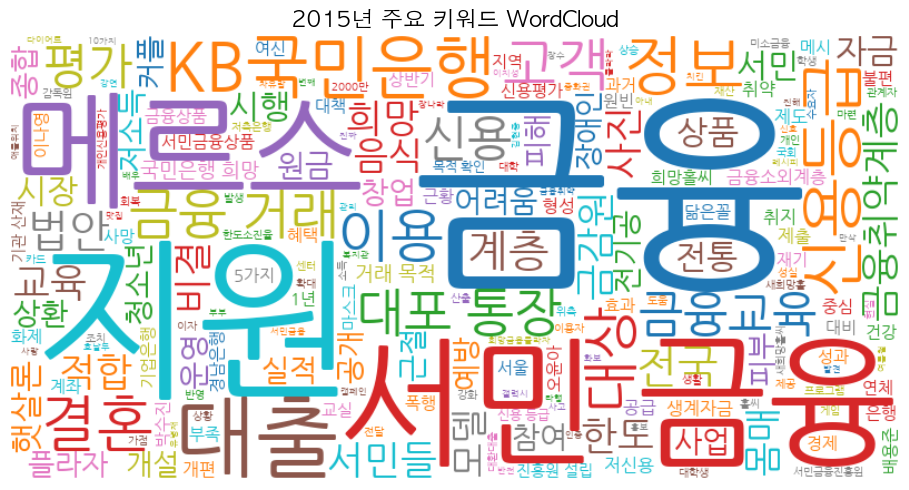

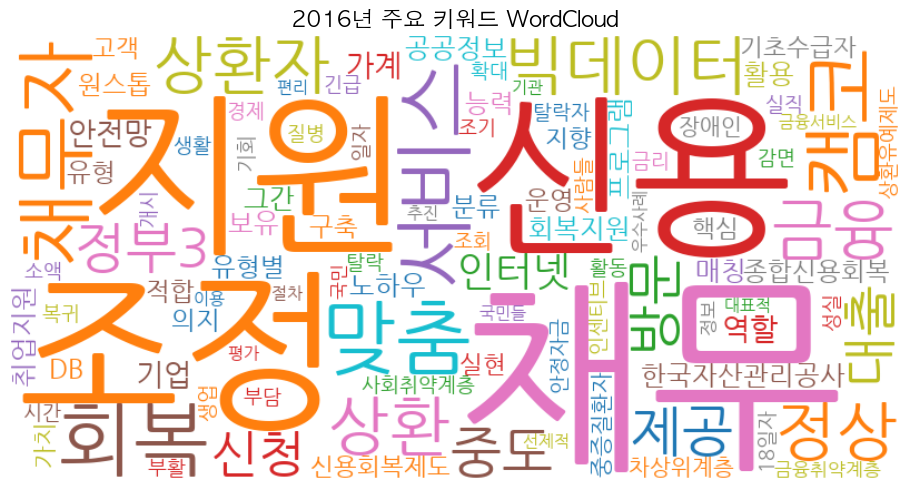

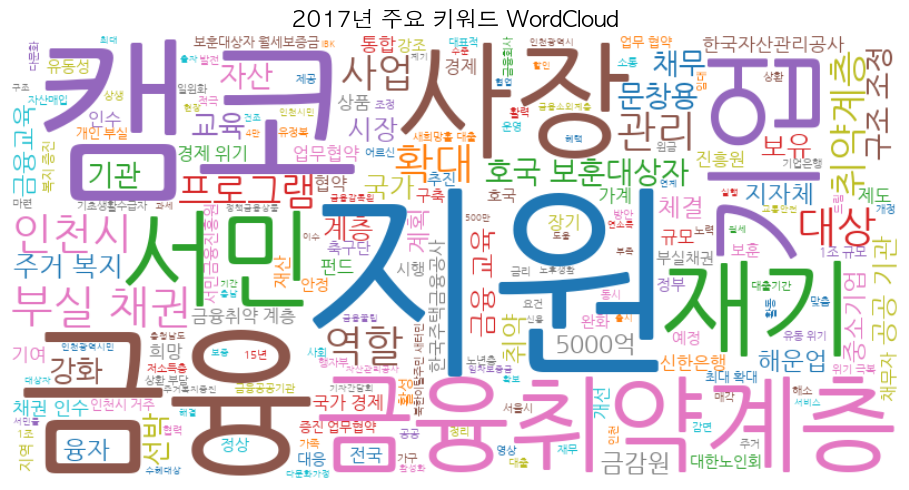

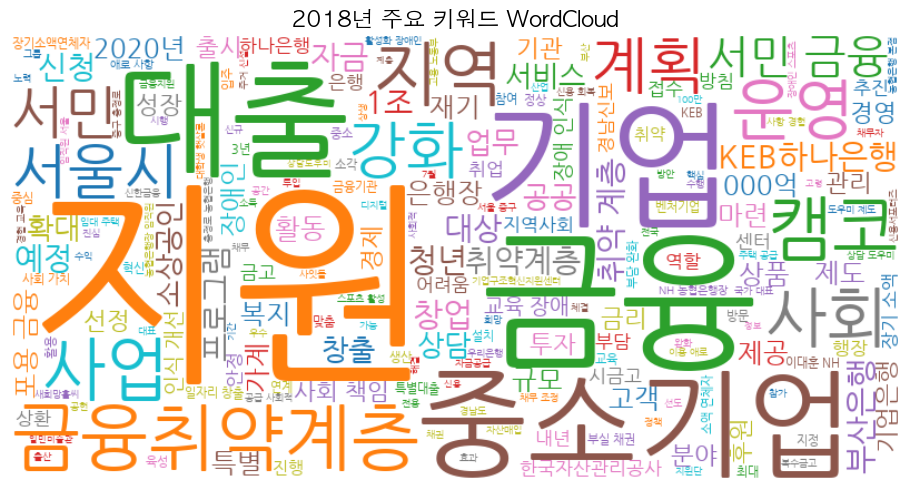

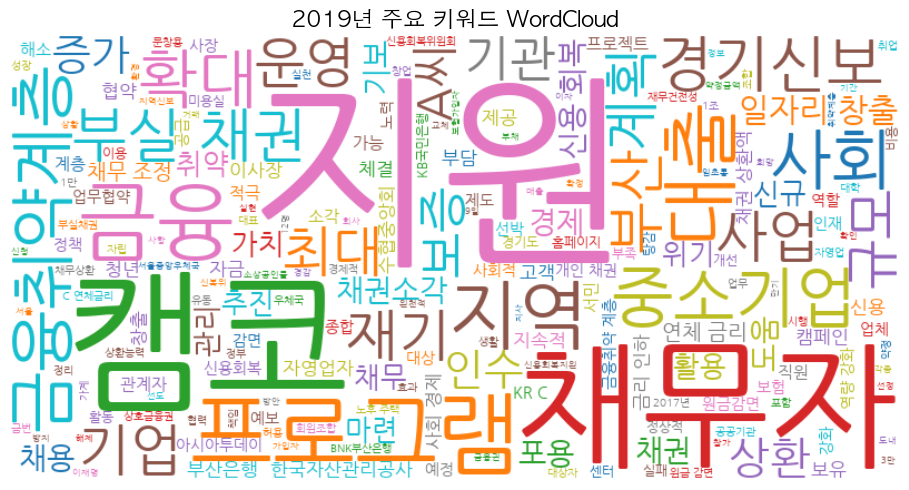

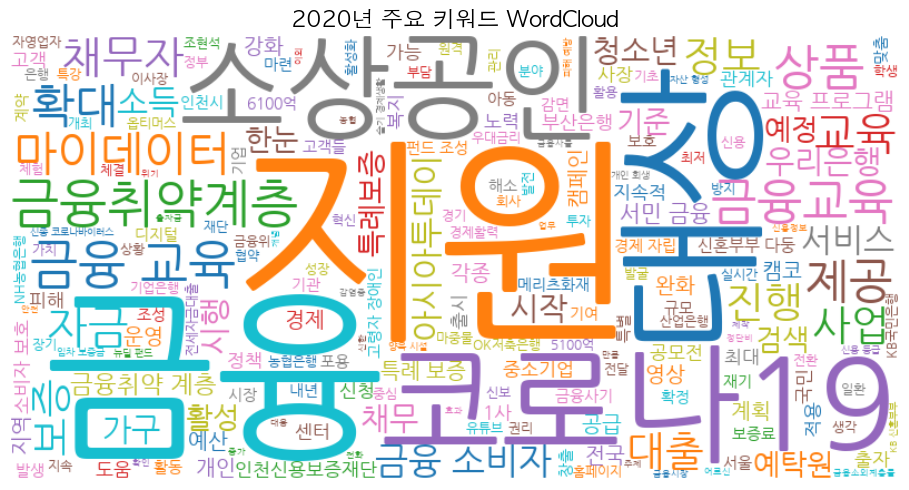

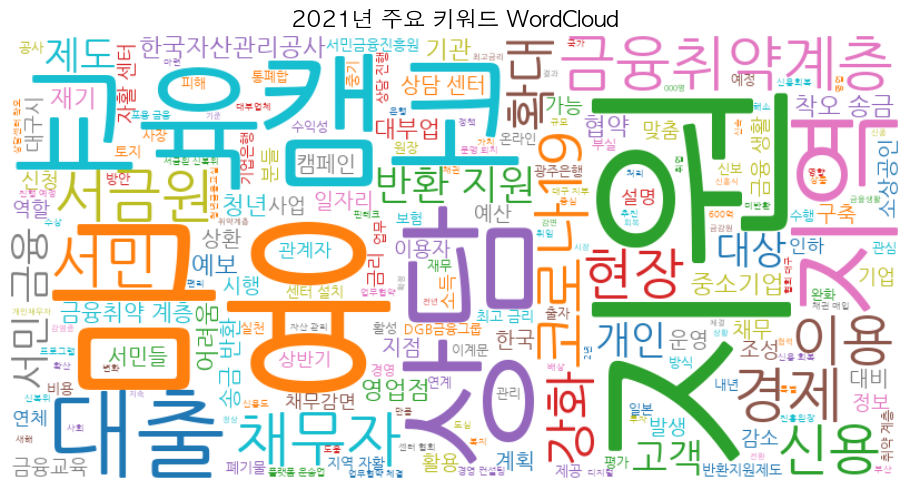

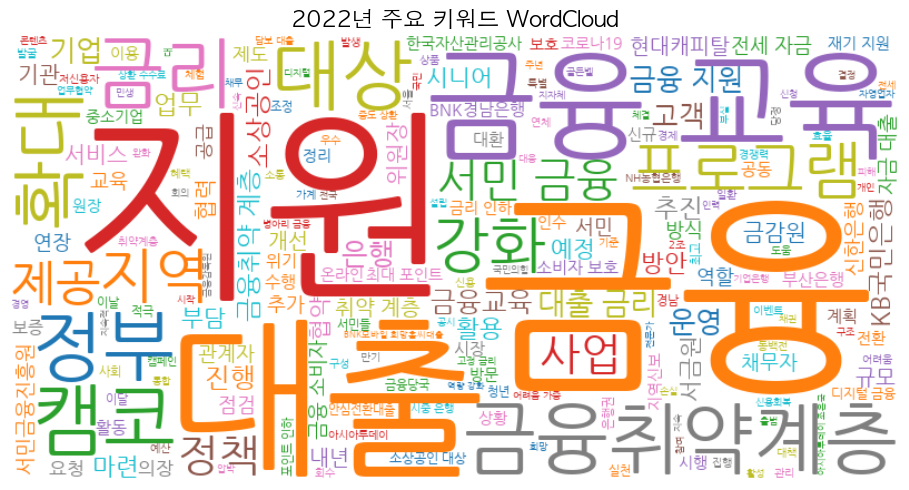

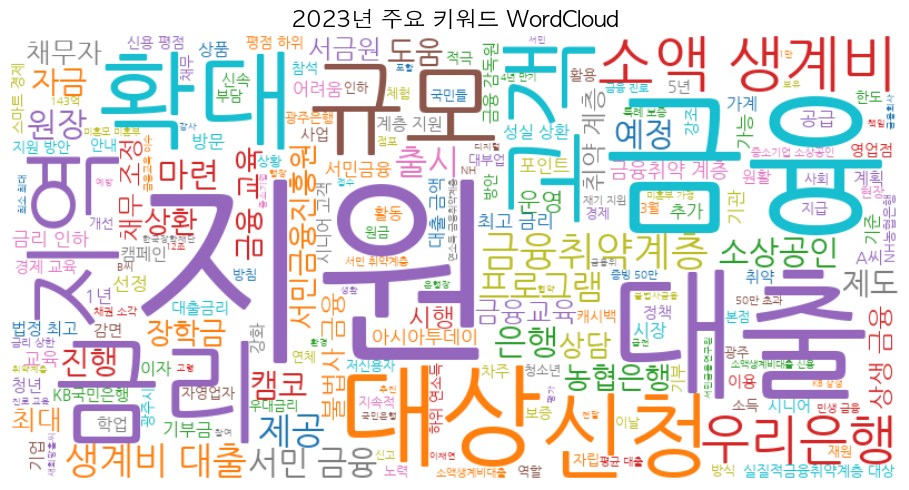

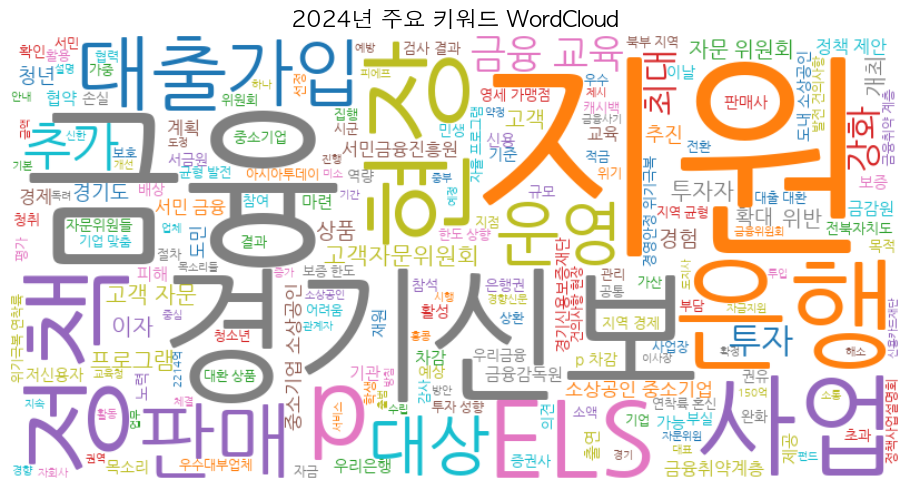

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.font_manager as fm  # 폰트 경로를 rcParams에 반영하기 위해 필요
from matplotlib import rc  


rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  

# --- 엑셀 파일 불러오기 ---
file_path = "/Users/jochaeyeon/Desktop/4-2/캡스톤_행정/capstondesign_-administration/필터링.xlsx"
df = pd.read_excel(file_path)

# # ✅ 너가 설치한 나눔고딕 폰트 경로 설정
# font_path = "/Users/jochaeyeon/Downloads/나눔 글꼴/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf"

# # ✅ matplotlib 한글 폰트 설정
# plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()
# plt.rcParams['axes.unicode_minus'] = False

# --- 연도 추출 ---
df['연도'] = pd.to_datetime(df['일자']).dt.year

# ============================
# 🎯 1. 연도별 기사 수 바 차트
# ============================
yearly_counts = df['연도'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title("연도별 기사 수")
plt.xlabel("연도")
plt.ylabel("기사 수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================
# 🎯 2. 연도별 키워드 워드클라우드
# ============================
yearly_keywords = defaultdict(list)

for _, row in df.iterrows():
    year = row['연도']
    keywords = str(row['키워드']).split(',') if pd.notnull(row['키워드']) else []
    yearly_keywords[year].extend(keywords)

# 연도별 워드클라우드 생성
for year, keywords in sorted(yearly_keywords.items()):
    text = ' '.join(keywords)
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        font_path=font_path,
        colormap='tab10'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{year}년 주요 키워드 WordCloud", fontsize=16)
    plt.tight_layout()
    plt.show()
